# LetsGrowMore  Task-1

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Loading Dataset

In [3]:
data = pd.read_csv('iris.data',names="Petal_length Petal_width Sepal_length Sepal_width Type".split())

In [4]:
data.head()

,Petal_length,Petal_width,Sepal_length,Sepal_width,Type
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Petal_length  150 non-null    float64
 1   Petal_width   150 non-null    float64
 2   Sepal_length  150 non-null    float64
 3   Sepal_width   150 non-null    float64
 4   Type          150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
data["Type"].value_counts()

Iris-versicolor    50
Iris-setosa        50
Iris-virginica     50
Name: Type, dtype: int64

# Checking for Null values in dataset

In [7]:
data.isnull().sum()

Petal_length    0
Petal_width     0
Sepal_length    0
Sepal_width     0
Type            0
dtype: int64

# Data Visualization

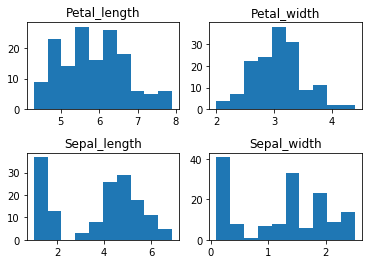

In [8]:
k = 1
for i in data.columns[:-1]:
    plt.subplot(2,2,k)
    plt.hist(data[i])
    plt.title(i)
    k += 1
    plt.subplots_adjust(hspace=0.5)
    
plt.show()

# Correlation Matrix

In [9]:
corr = data.corr()

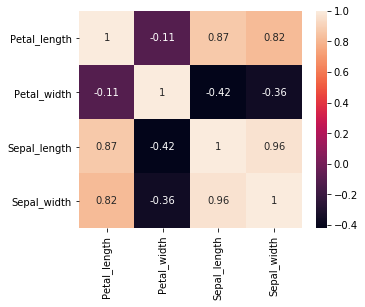

In [10]:
plt.subplots(figsize = (5,4))
sns.heatmap(corr,annot=True)
plt.show()

# Data Preprocessing

In [11]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [12]:
data['Type'] = le.fit_transform(data['Type'])

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X = data.drop(columns=['Type'])
y = data['Type']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3 , random_state=7)

In [15]:
X_train.shape

(105, 4)

In [16]:
X_test.shape

(45, 4)

In [17]:
y_train.shape

(105,)

In [18]:
y_test.shape

(45,)

# Model Training

In [19]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [20]:
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [21]:
model.coef_

array([-0.10766804, -0.00779718,  0.22585426,  0.61615683])

In [22]:
model.score(X_test,y_test)*100

88.939239443896

In [23]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [24]:
model.fit(X_train, y_train)
model.score(X_test,y_test)*100

C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


91.11111111111111

In [25]:
ypred = model.predict(X_test)

In [26]:
ypred

array([2, 1, 0, 1, 1, 0, 1, 1, 0, 1, 2, 1, 0, 2, 0, 2, 2, 2, 0, 0, 1, 2,
       1, 1, 2, 2, 1, 1, 2, 2, 2, 1, 0, 2, 1, 0, 0, 0, 0, 2, 2, 1, 2, 2,
       1])

In [27]:
from sklearn.metrics import mean_absolute_error , mean_squared_error , r2_score

In [28]:
print("mean_squared_error:  ",np.sqrt(mean_squared_error(y_test,ypred)))
print("mean_absolute_error: ",mean_absolute_error(y_test,ypred))
print("r2_score:            ",r2_score(y_test,ypred)*100)

mean_squared_error:   0.29814239699997197
mean_absolute_error:  0.08888888888888889
r2_score:             85.9375
